# Imports
## colocar como variavel de ambiente ou rodar na pasta C:\Users\Leonardo\AppData\Local\Programs\Python\Python311\Scripts
* pip3 install pandas
* pip3 install numpy
* pip3 install matplotlib
* pip3 install seaborn
* pip3 install nltk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
#nltk.download('averaged_perceptron_tagger')
#nltk.download('book')
#nltk.download()

plt.style.use("ggplot")

# Reading data

In [2]:
df = pd.read_csv("archive/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Diminuindo o processamento da tabela

In [3]:
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


# Analisando dados da planilha

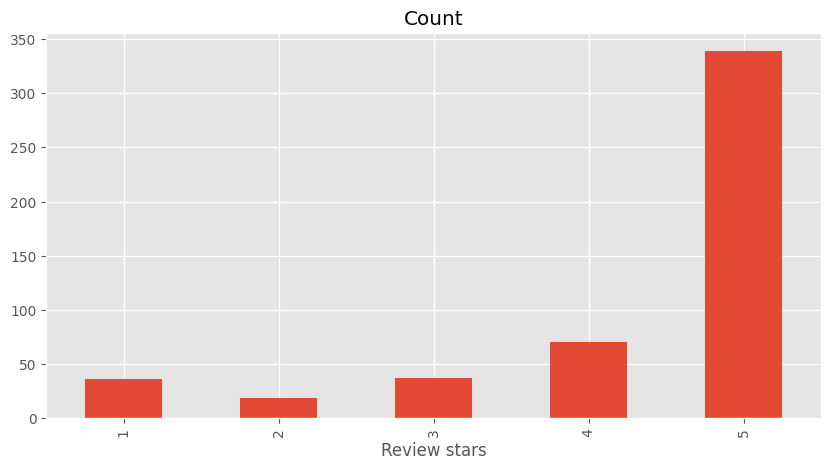

In [4]:
ax = df['Score'].value_counts().sort_index().plot(kind="bar", title="Count", figsize=(10,5))
ax.set_xlabel("Review stars")
plt.show()

# Testando o Basico do nltk

In [5]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
# convertendo o texto para uma forma mais facil da máquina entender
tokens = nltk.word_tokenize(example, preserve_line=True)
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [7]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good.', 'VB'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it.', 'JJ'), ('Quaker', 'NNP'), ('Oats', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')]


In [8]:
entities = nltk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good./VB
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it./JJ
  (PERSON Quaker/NNP Oats/NNP)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Using vander

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [11]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [12]:
res = {}
for i, row in df.iterrows():
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [13]:
print(res)

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}, 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}, 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}, 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}, 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}, 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}, 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}, 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}, 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}, 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}, 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}, 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}, 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}, 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}, 16: {'neg': 0.0

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


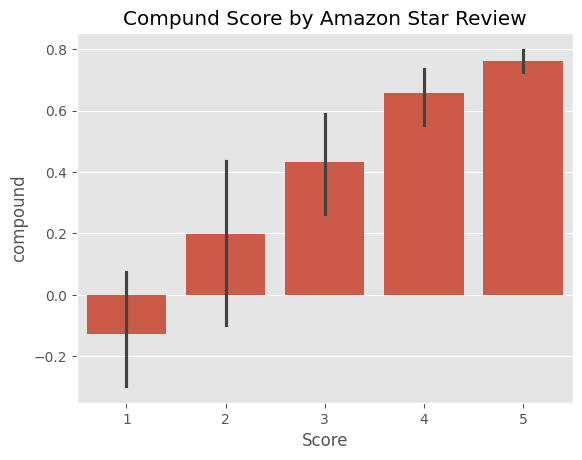

In [15]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

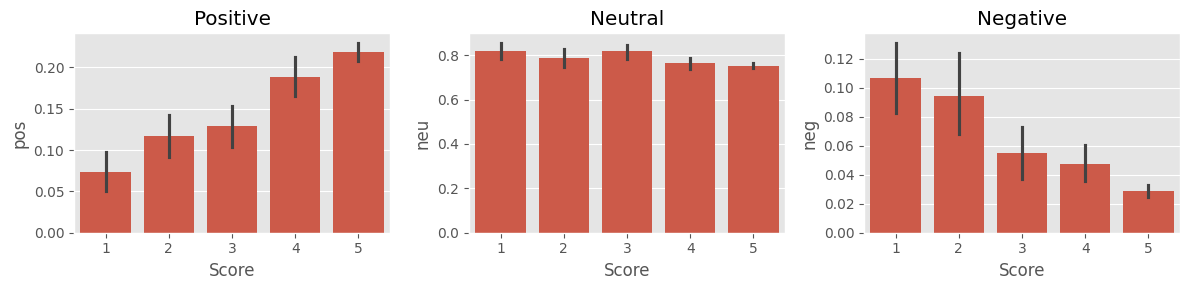

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Importar modelo de IA treinado chamado Roberta

In [17]:
#pip3 install transformers
#pip3 install scipy
#pip3 install torch
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

# reiniciar a máquina

c:\Users\Leonardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[0.2339, 0.7270, 0.3019],
        [0.6628, 0.1978, 0.8255],
        [0.8918, 0.2188, 0.8385],
        [0.7511, 0.7507, 0.1399],
        [0.1332, 0.9753, 0.8666]])


In [18]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\Leonardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Leonardo\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


# Using the model

In [26]:
# Run for Roberta Model
print(example)
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.0029573706}
